<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,45.227783,0.883173,56.110955,55.294002,0.816954
1,0.0,1.0,58.985068,-0.161594,68.823474,69.011114,-0.187640
2,0.0,2.0,85.354322,-0.068595,95.285727,95.303366,-0.017639
3,0.0,3.0,92.182843,-0.434914,101.747928,102.111946,-0.364018
4,0.0,4.0,54.257230,0.534478,64.791709,64.297082,0.494627
...,...,...,...,...,...,...,...
59995,999.0,55.0,96.085109,0.396305,106.481415,106.134856,0.346559
59996,999.0,56.0,98.135905,0.367473,108.503379,108.186905,0.316474
59997,999.0,57.0,41.398758,-0.249264,51.149494,51.415105,-0.265611
59998,999.0,58.0,32.704356,-0.509433,42.194923,42.715393,-0.520470


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,45.227783,0.883173,56.110955,55.294002,0.816954
1,0.0,1.0,58.985068,-0.161594,68.823474,69.011114,-0.187640
2,0.0,2.0,85.354322,-0.068595,95.285727,95.303366,-0.017639
3,0.0,3.0,92.182843,-0.434914,101.747928,102.111946,-0.364018
4,0.0,4.0,54.257230,0.534478,64.791709,64.297082,0.494627
...,...,...,...,...,...,...,...
59995,999.0,55.0,96.085109,0.396305,106.481415,106.134856,0.346559
59996,999.0,56.0,98.135905,0.367473,108.503379,108.186905,0.316474
59997,999.0,57.0,41.398758,-0.249264,51.149494,51.415105,-0.265611
59998,999.0,58.0,32.704356,-0.509433,42.194923,42.715393,-0.520470


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    45.227783  0.883173   56.110955   55.294002  0.816954
      1.0    58.985068 -0.161594   68.823474   69.011114 -0.187640
      2.0    85.354322 -0.068595   95.285727   95.303366 -0.017639
      3.0    92.182843 -0.434914  101.747928  102.111946 -0.364018
      4.0    54.257230  0.534478   64.791709   64.297082  0.494627
...                ...       ...         ...         ...       ...
999.0 55.0   96.085109  0.396305  106.481415  106.134856  0.346559
      56.0   98.135905  0.367473  108.503379  108.186905  0.316474
      57.0   41.398758 -0.249264   51.149494   51.415105 -0.265611
      58.0   32.704356 -0.509433   42.194923   42.715393 -0.520470
      59.0   97.210141  0.398074  107.608215  107.260575  0.347640

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    45.227783  0.883173   56.110955   55.294002  0.816954
      1.0    58.985068 -0.161594   68.823474   69.011114 -0.187640
      2.0    85.354322 -0.068595   95.285727   95.303366 -0.017639
      3.0    92.182843 -0.434914  101.747928  102.111946 -0.364018
      4.0    54.257230  0.534478   64.791709   64.297082  0.494627
...                ...       ...         ...         ...       ...
999.0 55.0   96.085109  0.396305  106.481415  106.134856  0.346559
      56.0   98.135905  0.367473  108.503379  108.186905  0.316474
      57.0   41.398758 -0.249264   51.149494   51.415105 -0.265611
      58.0   32.704356 -0.509433   42.194923   42.715393 -0.520470
      59.0   97.210141  0.398074  107.608215  107.260575  0.347640

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,45.227783,0.883173,56.110955,55.294002,0.816954
1,0.0,1.0,58.985068,-0.161594,68.823474,69.011114,-0.187640
2,0.0,2.0,85.354322,-0.068595,95.285727,95.303366,-0.017639
3,0.0,3.0,92.182843,-0.434914,101.747928,102.111946,-0.364018
4,0.0,4.0,54.257230,0.534478,64.791709,64.297082,0.494627
...,...,...,...,...,...,...,...
59995,999.0,55.0,96.085109,0.396305,106.481415,106.134856,0.346559
59996,999.0,56.0,98.135905,0.367473,108.503379,108.186905,0.316474
59997,999.0,57.0,41.398758,-0.249264,51.149494,51.415105,-0.265611
59998,999.0,58.0,32.704356,-0.509433,42.194923,42.715393,-0.520470


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    45.227783  0.883173   56.110955   55.294002  0.816954
      1.0    58.985068 -0.161594   68.823474   69.011114 -0.187640
      2.0    85.354322 -0.068595   95.285727   95.303366 -0.017639
      3.0    92.182843 -0.434914  101.747928  102.111946 -0.364018
      4.0    54.257230  0.534478   64.791709   64.297082  0.494627
...                ...       ...         ...         ...       ...
999.0 55.0   96.085109  0.396305  106.481415  106.134856  0.346559
      56.0   98.135905  0.367473  108.503379  108.186905  0.316474
      57.0   41.398758 -0.249264   51.149494   51.415105 -0.265611
      58.0   32.704356 -0.509433   42.194923   42.715393 -0.520470
      59.0   97.210141  0.398074  107.608215  107.260575  0.347640

[60000 rows x 5 columns]

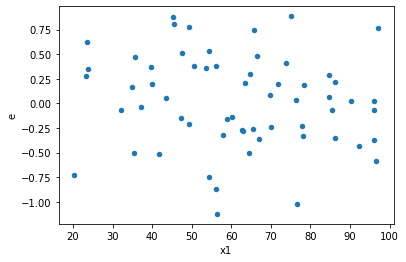

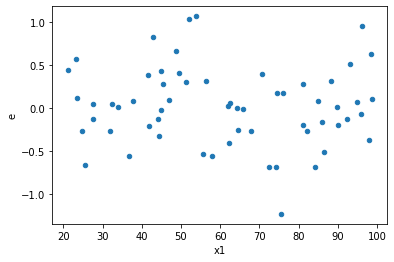

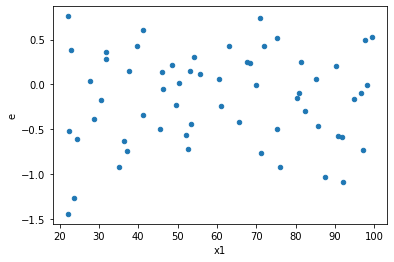

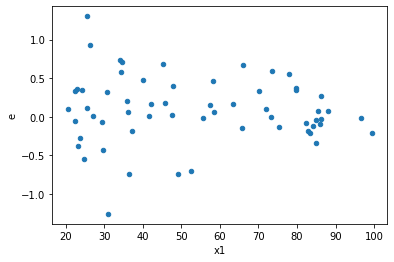

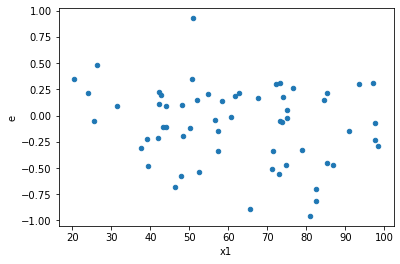

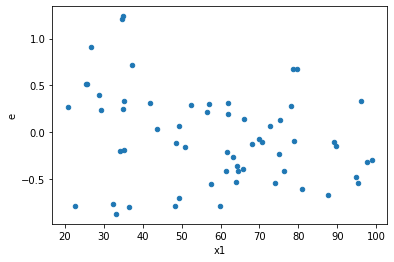

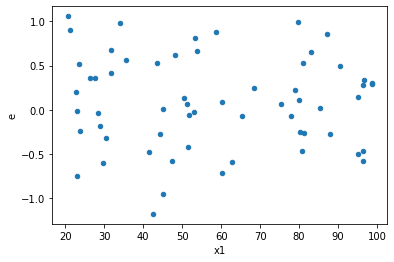

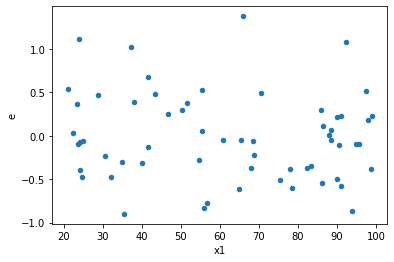

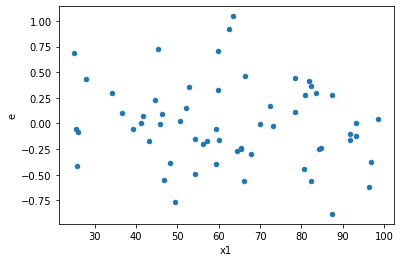

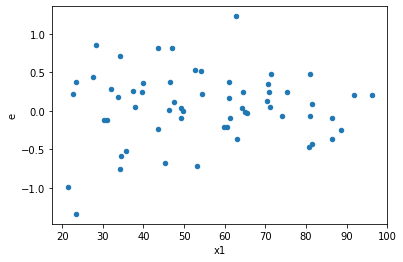

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,23.0,23.0,3.034287971520905,4.634652045783883,0.1319255639791698,0.2015066106862558,1.5274265624369239,0.31679525075779136,0.8416023746211043,0.15839762537889568,Reject001=1 : Homoscedasticity
4.0,23.0,23.0,2.9762289554001864,3.338980389357082,0.12940125893044288,0.14517306040682965,1.1218829059836628,0.7850639877947425,0.6074680061026287,0.39253199389737126,Reject001=1 : Homoscedasticity
11.0,23.0,23.0,3.9526573335440793,4.692421458475962,0.17185466667582955,0.20401832428156355,1.187156149017498,0.6842315414496964,0.6578842292751518,0.3421157707248482,Reject001=1 : Homoscedasticity
13.0,23.0,23.0,4.2874593372993,6.376517730612174,0.18641127553475217,0.2772399013309641,1.487248561202399,0.3479958664126972,0.8260020667936514,0.1739979332063486,Reject001=1 : Homoscedasticity
18.0,23.0,23.0,3.6273176988077753,3.644888504667629,0.15770946516555545,0.15847341324641864,1.0048440217590062,0.9908546255285517,0.5045726872357241,0.4954273127642759,Reject001=1 : Homoscedasticity
19.0,23.0,23.0,3.5392684771063765,4.880345530488743,0.15388123813505986,0.21218893610820622,1.3789136263770527,0.4469541363541618,0.7765229318229191,0.2234770681770809,Reject001=1 : Homoscedasticity
21.0,23.0,23.0,4.604945112139817,6.791325743553393,0.20021500487564423,0.2952750323284084,1.4747897267330539,0.3582435805783146,0.8208782097108427,0.1791217902891573,Reject001=1 : Homoscedasticity
24.0,23.0,23.0,2.0412963095981795,5.49546847525096,0.08875201346079041,0.23893341196743306,2.6921463823802827,0.02121878288335055,0.9893906085583247,0.010609391441675275,Reject001=1 : Homoscedasticity
25.0,23.0,23.0,4.099373401282203,5.032870891635667,0.17823362614270447,0.2188204735493768,1.2277171164894334,0.6268181048932,0.6865909475534,0.3134090524466,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,4.8185278712771265,4.142853481199062,0.20950121179465767,0.1801240643999592,0.8597757638581469,0.7201919699325637,Reject001=1 : Homoscedasticity
1.0,23.0,23.0,3.034287971520905,4.634652045783883,0.1319255639791698,0.2015066106862558,1.5274265624369239,0.31679525075779136,Reject001=1 : Homoscedasticity
2.0,23.0,23.0,7.052202273613631,6.337523651316545,0.30661749015711437,0.2755445065789802,0.8986588026592612,0.79996447762633,Reject001=1 : Homoscedasticity
3.0,23.0,23.0,7.270465553734845,1.4133448201236913,0.31610719798847153,0.06144977478798658,0.19439536707489863,0.0002175963975168647,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,2.9762289554001864,3.338980389357082,0.12940125893044288,0.14517306040682965,1.1218829059836628,0.7850639877947425,Reject001=1 : Homoscedasticity
5.0,23.0,23.0,8.56701917120117,3.106419779833094,0.3724790944000509,0.1350617295579606,0.36260217442673787,0.01837314855181157,Reject001=1 : Homoscedasticity
6.0,23.0,23.0,7.162565972263314,4.102795450161288,0.3114159118375354,0.17838241087657775,0.5728108426573888,0.18905878435706544,Reject001=1 : Homoscedasticity
7.0,23.0,23.0,5.618043396313462,3.672708821984085,0.24426275636145486,0.1596829922601776,0.6537345055743253,0.3151313635504206,Reject001=1 : Homoscedasticity
8.0,23.0,23.0,2.801873180769558,2.665936925769196,0.1218205730769373,0.11591030112039982,0.9514837945081347,0.9060995033828815,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      960
Reject001=0 : Heteroscedasticity     40
Name: Result_test, dtype: int64